In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
path = "../input/soccer/database.sqlite"  # Remove the extra slash

# Connect to the SQLite database
try:
    conn = sqlite3.connect(path)
    print("Database connection successful.")
except sqlite3.Error as e:
    print(f"Database connection failed: {e}")

Database connection successful.


In [2]:

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type = 'table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [3]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [4]:
countries_n = pd.read_sql("""SELECT COUNT(*)
                        FROM Country;""", conn)
countries_n

,COUNT(*)
0,11


In [5]:
match = pd.read_sql("""SELECT *
                    FROM match limit 10""", conn)
match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
5,6,1,1,2008/2009,1,2008-09-24 00:00:00,492478,8203,8342,1,...,1.67,4.35,3.40,1.70,4.50,3.40,1.70,NaN,NaN,NaN
6,7,1,1,2008/2009,1,2008-08-16 00:00:00,492479,9999,8571,2,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
7,8,1,1,2008/2009,1,2008-08-16 00:00:00,492480,4049,9996,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20
8,9,1,1,2008/2009,1,2008-08-16 00:00:00,492481,10001,9986,1,...,3.10,2.25,3.25,2.80,2.20,3.30,2.80,2.25,3.20,2.80
9,10,1,1,2008/2009,10,2008-11-01 00:00:00,492564,8342,8571,4,...,10.00,1.30,4.35,8.50,1.25,5.00,10.00,1.29,4.50,9.00


In [6]:
player = pd.read_sql("""SELECT *
                    FROM player limit 10""", conn)
player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
5,6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
6,7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
7,8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.10,139
8,9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.50,181
9,10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [7]:
Player_Attributes = pd.read_sql("""SELECT *
                                FROM Player_Attributes limit 10""", conn)
Player_Attributes

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
1,2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,...,54,48,65,69,69,6,11,10,8,8
2,3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,...,54,48,65,66,69,6,11,10,8,8
3,4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
4,5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,...,53,47,62,63,66,5,10,9,7,7
5,6,189615,155782,2016-04-21 00:00:00,74,76,left,high,medium,80,...,66,59,76,75,78,14,7,9,9,12
6,7,189615,155782,2016-04-07 00:00:00,74,76,left,high,medium,80,...,66,59,76,75,78,14,7,9,9,12
7,8,189615,155782,2016-01-07 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12
8,9,189615,155782,2015-12-24 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12
9,10,189615,155782,2015-12-17 00:00:00,73,75,left,high,medium,79,...,65,59,76,75,78,14,7,9,9,12


In [8]:
league = pd.read_sql("""SELECT  l.id,l.country_id,c.name
                    FROM league l
                    JOIN country as c ON c.id = l.country_id;""", conn)
league

,id,country_id,name
0,1,1,Belgium
1,1729,1729,England
2,4769,4769,France
3,7809,7809,Germany
4,10257,10257,Italy
5,13274,13274,Netherlands
6,15722,15722,Poland
7,17642,17642,Portugal
8,19694,19694,Scotland
9,21518,21518,Spain


In [9]:
leagues = pd.read_sql("""SELECT  l.id,l.country_id,c.name
                    FROM league  as l
                    JOIN country as c ON c.id = l.country_id
                    WHERE l.id =1729;""", conn)
leagues

,id,country_id,name
0,1729,1729,England


In [10]:
teams = pd.read_sql("""SELECT *
                    FROM team
                    order by id 
                    limit 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [11]:
detailed_matches = pd.read_sql("""SELECT Match.id,
                                        Country.name AS country_name,
                                        League.name as league_name,
                                        season,
                                        date,
                                        HT.team_long_name as home_team,
                                        AT.team_long_name as away_team,
                                        home_team_goal,
                                        away_team_goal
                                FROM Match
                                JOIN country ON country.id = match.country_id
                                JOIN league ON league.id = match.league_id
                                LEFT JOIN team as ht ON ht.team_api_id = match.home_team_api_id
                                LEFT JOIN team as At ON At.team_api_id = match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER BY date
                                limit 10;""", conn)
detailed_matches

,id,country_name,league_name,season,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


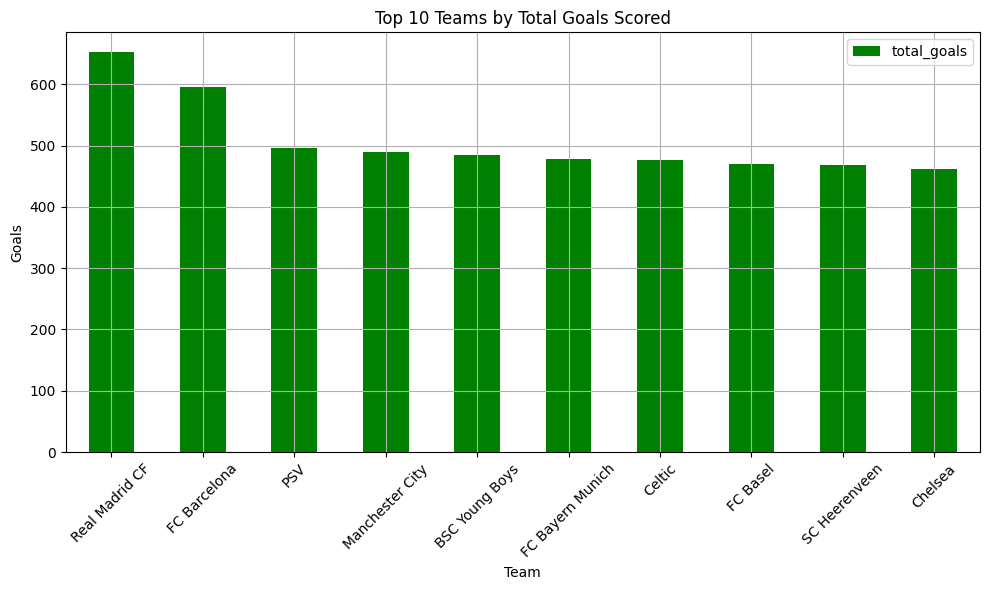

In [12]:
top_goals = pd.read_sql("""
    SELECT team_long_name, SUM(home_team_goal + away_team_goal) as total_goals
    FROM match m
    JOIN team t ON m.home_team_api_id = t.team_api_id
    GROUP BY team_long_name
    ORDER BY total_goals DESC
    LIMIT 10;
    """,conn)

top_goals.plot(kind='bar', x = 'team_long_name', y='total_goals', figsize=(10, 6), color='green')
plt.title('Top 10 Teams by Total Goals Scored')
plt.ylabel('Goals')
plt.xlabel('Team')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

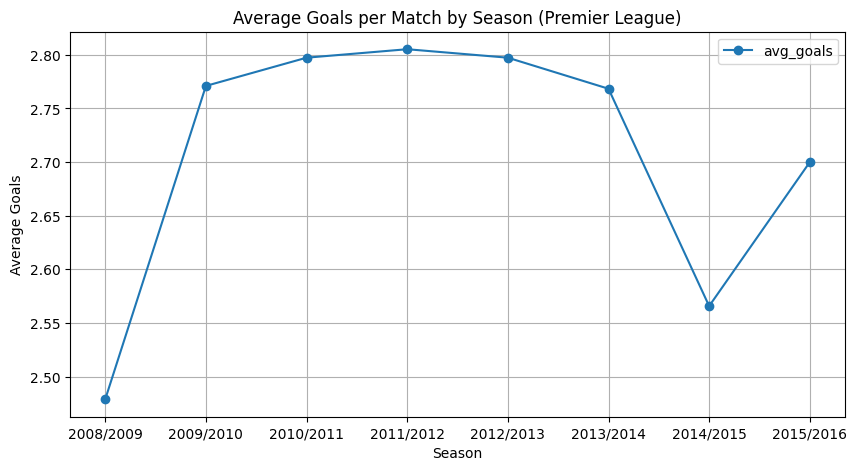

In [13]:
avg_goals = pd.read_sql("""
    SELECT season, AVG(home_team_goal + away_team_goal) as avg_goals
    FROM match
    WHERE league_id = 1729  -- Premier League
    GROUP BY season
    ORDER BY season;
""", conn)

avg_goals.plot(kind='line', x='season', y='avg_goals', marker='o', figsize=(10, 5))
plt.title('Average Goals per Match by Season (Premier League)')
plt.xlabel('Season')
plt.ylabel('Average Goals')
plt.grid(True)
plt.show()


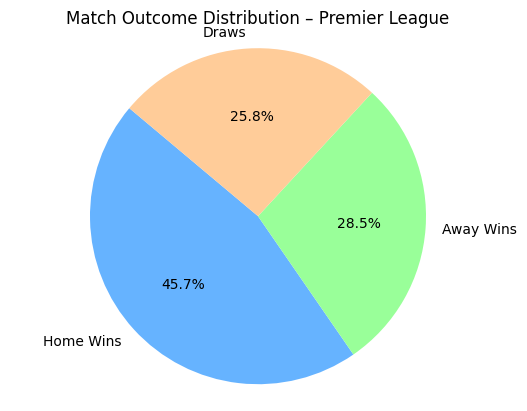

In [14]:
result = pd.read_sql("""
    SELECT
        SUM(CASE WHEN home_team_goal > away_team_goal THEN 1 ELSE 0 END) as home_wins,
        SUM(CASE WHEN home_team_goal < away_team_goal THEN 1 ELSE 0 END) as away_wins,
        SUM(CASE WHEN home_team_goal = away_team_goal THEN 1 ELSE 0 END) as draws
    FROM match
    WHERE league_id = 1729;
""", conn)

labels = ['Home Wins', 'Away Wins', 'Draws']
sizes = [result.loc[0, 'home_wins'], result.loc[0, 'away_wins'], result.loc[0, 'draws']]
colors = ['#66b3ff', '#99ff99', '#ffcc99']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Match Outcome Distribution – Premier League')
plt.show()


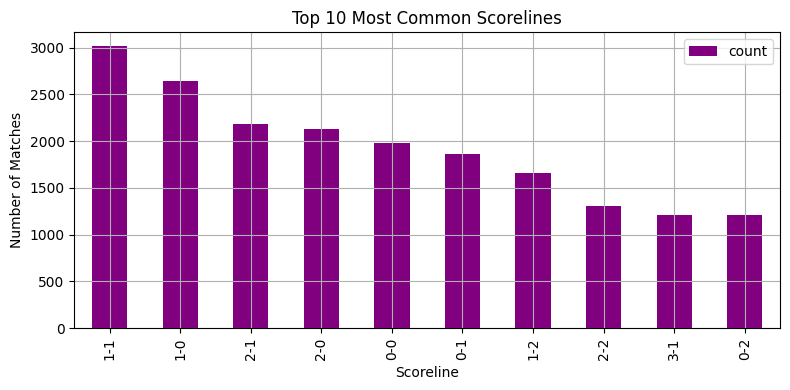

In [15]:
scorelines = pd.read_sql("""
    SELECT CONCAT(home_team_goal, '-', away_team_goal) as scoreline,
           COUNT(*) as count
    FROM match
    GROUP BY scoreline
    ORDER BY count DESC
    LIMIT 10;
""", conn)

scorelines.plot(kind='bar', x='scoreline', y='count', color='purple', figsize=(8, 4))
plt.title('Top 10 Most Common Scorelines')
plt.xlabel('Scoreline')
plt.ylabel('Number of Matches')
plt.grid(True)
plt.tight_layout()
plt.show()
